# <center> Course: CHE1147H - Data Mining in Engineering <center>
## <center> Programming Assignment 4: Batch <center>
    
#### <center> Yunjie Xu 1008601951<center> 
    


In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MaxAbsScaler
import  seaborn as sns

## 2 Batch data analysis
### 2.1 Build a Batch Statistical Process Control model
    1. Import the data from ’bakers yeast reference batches.xlsx’. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?
    
<div style='color:darkgreen'> Number of batches is 16. There are 83 points per batch, the duration of each batch is 13.667. There are 8 variables, including "Time","Ethanol","Temperature","Molasses flow","NH3 flow","Air flow	","Level","pH" respectively.

In [2]:
# Import the data
batch = pd.read_excel('bakers_yeast_reference_batches.xlsx')
batch.head()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.328,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.476,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.155,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.011,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.450,39.26990,2636.96,43.6572,5.18145


In [3]:
print(f'Number of batches is {len(batch.BatchID.unique())}.')

Number of batches is 16.


In [4]:
#duration for each batch
duration = batch.groupby('BatchID')['Time'].max()

#data points per batch
points = batch.groupby('BatchID')['Time'].count()

# initialize data of lists.
data = {'Duration': batch.groupby('BatchID')['Time'].max(),
        'Points': batch.groupby('BatchID')['Time'].count()}
  
# Create DataFrame
df_21 = pd.DataFrame(data)
df_21

,Duration,Points
BatchID,,
Ma,13.6667,83
Na,13.6667,83
Ta,13.6667,83
Va,13.6667,83
Xa,13.6667,83
bb,13.6667,83
cb,13.6667,83
db,13.6667,83
eb,13.6667,83


    2. Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?
    
    
<div style='color:darkgreen'> There are existing outliers, for example, 'Va', 'fb' and 'cb' batches in 'Ethanol' and 'Va' batch in 'Air flow',becuasue we can clearly see that the plot flutuate at a extreme levl. The variable 'Ethanol' and 'pH' has the lowest variabiltiy, and variables 'Molasses flow' and 'Air flow' have very largest variability, because these variables flucuate at larger scale.



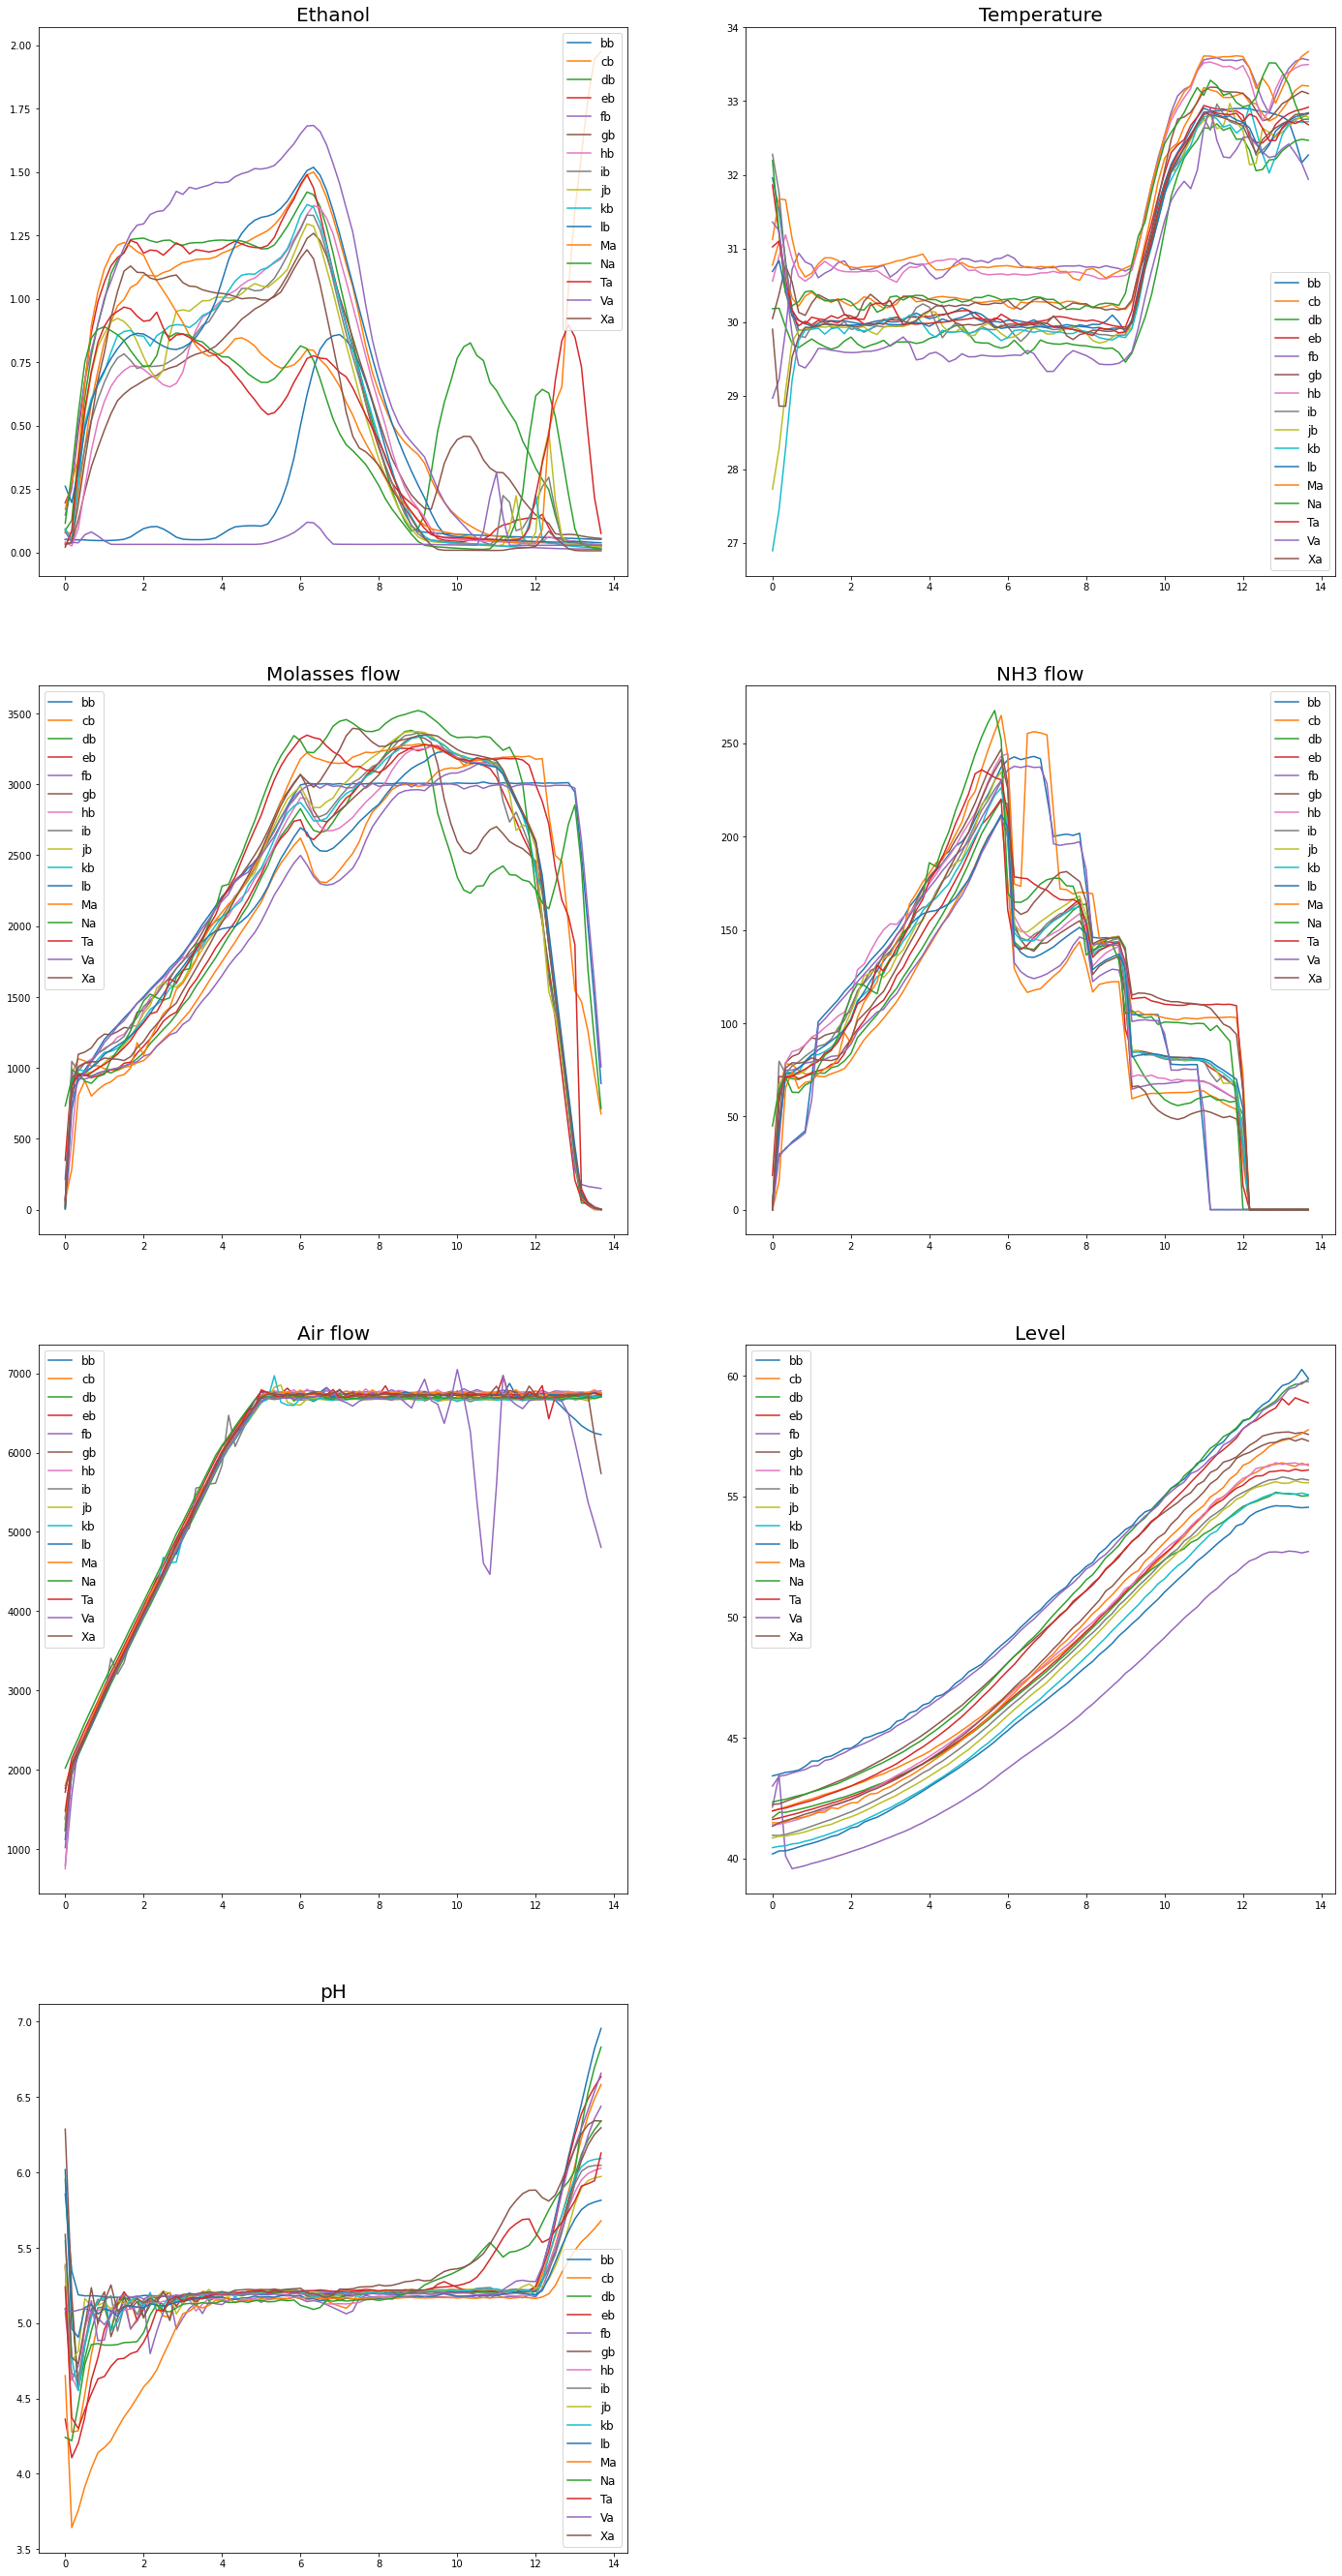

In [5]:
plt.figure(figsize=(24,48))
variables = batch.columns[-7:]

for i in range(len(batch.columns[-7:])):
    plt.subplot(4,2,i+1)
    for j in batch.BatchID.unique():
        temp = batch[batch.BatchID==j]
        plt.plot(temp['Time'],temp[variables[i]],label=j)
        plt.title(variables[i],fontsize=20)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(fontsize=12)
    

    3. Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.
    
**X dimension: (1328, 8)\
T dimension: (1328, 5)\
P dimension: (8, 5)**

In [6]:
# Standardize data
batch_type = list(set(batch['BatchID']))
batch_clean = batch.drop(["Unnamed: 0","Primary ID"], axis=1)
batch_clean.set_index("BatchID", inplace=True)

scaler = StandardScaler()
batch_scaled = scaler.fit_transform(batch_clean)

In [7]:
# perform PCA with 5 PCs
pca = PCA(n_components=5, svd_solver='full')

# Extract the scores
scores = pca.fit_transform(batch_scaled)
scores_df = pd.DataFrame(data = scores
                         ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                         ,index = batch_clean.index)
scores_df

,PC1,PC2,PC3,PC4,PC5
BatchID,,,,,
bb,-0.808176,4.508288,-0.200368,1.295502,-0.754945
bb,-1.303347,3.391210,0.824346,0.666865,-0.552935
bb,-1.630004,3.073121,1.085677,0.706676,-0.168488
bb,-1.790453,2.816650,1.059588,0.979711,0.160562
bb,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
Xa,3.772295,2.368292,-1.644665,0.830572,-0.163892
Xa,3.875235,2.595895,-1.942104,0.980115,-0.265168
Xa,3.963794,2.665704,-2.074648,1.041445,-0.323446


In [8]:
# Extract the loadings
loadings_df = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
                           ,index = batch_clean.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


    4. In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [9]:
# Add column 'Time'
scores_df['Time'] = batch_clean['Time']

# pivot the scores BatchID with index 'Time'
scores_pivot = scores_df.pivot_table(index=['Time'],columns=['BatchID'])
pd.set_option('display.max_columns', None)
scores_pivot

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                                       \
BatchID          cb        db        eb        fb        gb        hb   
Time                                                                    
0.000000  -1.732160 -1.483465 -2.607604 -2.574646 -0.988024 -2.394971   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375 -2.025633 -2.494164   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104 -2.621874 -2.559011   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636 -2.403906 -2.285031   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582 -2.283938 -2.286304   
...             ...       ...       ...       ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  3.628018  3.574153   
13.166700  3.812695  3.385515  3.900761  3.531415  3.757124  3.659058   
13.333300  4.008694  3.523197  4.035689  3.730366  3.891336  3.735740   
13.500000  4.187002  3.613033  4.143437  3.877819  4.005824  3.788860   
13.666700  4.289330  3.696612  4.246451  3.984240  4.053639  3.814986   

                                                        PC2            \
BatchID          ib        jb        kb        lb        Ma        Na   
Time                                                                    
0.000000  -1.716642 -2.935541 -3.077506 -1.535126  3.997708  3.007727   
0.166667  -2.337457 -3.344797 -3.609045 -2.391797  3.184365  2.412194   
0.333333  -2.741569 -3.149246 -3.683228 -2.690865  2.338981  2.145089   
0.500000  -2.754166 -2.661362 -3.164454 -2.629205  2.005271  2.192883   
0.666667  -2.660871 -2.703602 -2.794785 -2.641025  1.985445  2.168921   
...             ...       ...       ...       ...       ...       ...   
13.000000  3.322751  3.158507  3.295900  3.019844  0.957229  0.793974   
13.166700  3.425092  3.281912  3.414330  3.080902  0.982221  1.181135   
13.333300  3.483032  3.372336  3.477475  3.141142  1.068574  1.689542   
13.500000  3.525769  3.433568  3.500695  3.180114  1.236806  2.052255   
13.666700  3.563142  3.456211  3.523428  3.219227  1.437185  2.400525   

                                                                       \
BatchID          Ta        Va        Xa        bb        cb        db   
Time                                                                    
0.000000   4.245963  4.355127  4.318990  4.508288  4.172215  4.470604   
0.166667   2.650996  3.320517  2.511992  3.391210  2.540984  2.899993   
0.333333   2.240788  3.009212  2.134598  3.073121  2.158644  2.263694   
0.500000   2.090238  2.755027  2.177314  2.816650  2.081301  2.164333   
0.666667   1.959381  2.541502  2.197973  2.636318  2.092789  2.116105   
...             ...       ...       ...       ...       ...       ...   
13.000000  0.954595  0.821437  2.368292  0.846628  2.382466  2.302893   
13.166700  2.158692  1.237511  2.595895  1.214437  2.643571  2.543902   
13.333300  2.302010  1.711288  2.665704  1.585314  2.764020  2.592414   
13.500000  2.419498  2.156445  2.872436  1.951712  2.820531  2.641512  

    5. Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

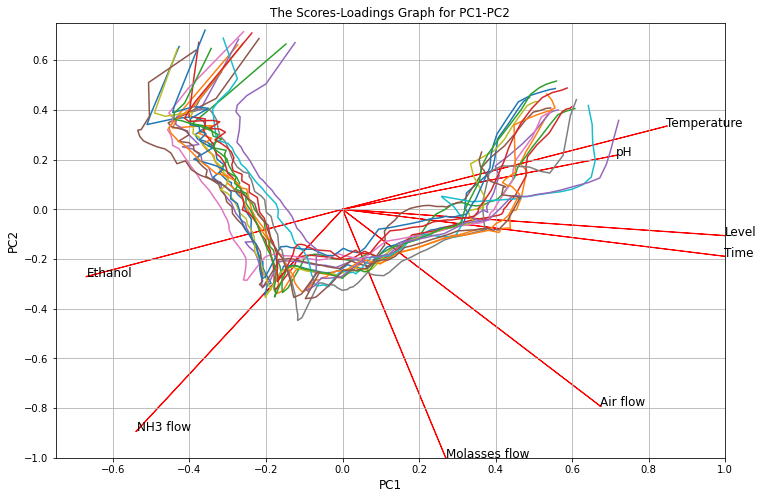

In [10]:
plt.figure(figsize=(12,8))

for i in batch_type:
    
    # Scores
    xt = np.array(scores_pivot['PC1'][i])
    yt = np.array(scores_pivot['PC2'][i])
    xt_scaled = xt / (xt.max() - xt.min())
    yt_scaled = yt / (yt.max() - yt.min())
    
    # Visualize the different batch 
    plt.plot(xt_scaled, yt_scaled)
    

# Loading
p_scaled = MaxAbsScaler().fit_transform(loadings_df.iloc[:,:2])

# Visualize the direction of raw material 
for i in range(loadings_df.shape[0]):
    plt.arrow(0, 0, p_scaled[i,0], 
              p_scaled[i,1], color = 'red')
    
    plt.text(p_scaled[i,0], p_scaled[i,1], 
             loadings_df.index [i],  size=12)


plt.xlim(-.75,1)
plt.ylim(-1,.75)
plt.title ('The Scores-Loadings Graph for PC1-PC2',fontsize=12)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid()
plt.show()

    6. Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?
    
<div style='color:darkgreen'>
    
From the graph, we can conclude that the batches start in the top left and end in the top right. And the kink happened in the third quarter where the direction for all batches changed toward the first quarter. On the other hand 'Ethanol' and 'NH3 flow' arrows are very closed to the kink, therefore, there may have some large changes between these two variables, becuase sudden change at the knik refers to different phrases which controls different variables. For first phase, Molasses flow and Air flow seems not change. For second phase, Ethanol, NH3 flow, Temperature and pH 's  fluctuation is very small. 

    
    


    7. Plot the cumulative explained variance. How much variance do the first two principal components capture?

In [11]:
pca_per = pca.explained_variance_ratio_
pca_2 = pca_per[0] + pca_per[1]
pca_3 = pca_per[0] + pca_per[1] + pca_per[2]
pca_4 = pca_per[0] + pca_per[1] + pca_per[2] + pca_per[3]
pca_5 = pca_per[0] + pca_per[1] + pca_per[2] + pca_per[3] + pca_per[4]
print(f'The two principal components capture {round(pca_2,5)} variance.')

The two principal components capture 0.78467 variance.


<Figure size 576x432 with 0 Axes>

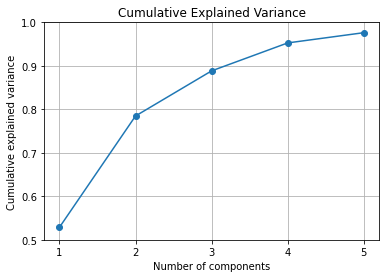

In [12]:
plt.figure(figsize=(8,6))

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot([1,2,3,4,5], 
         [pca_per[0],pca_2,pca_3,pca_4,pca_5],
         '-o')

plt.title ('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.ylim(0.5,1)
plt.grid()
plt.show()

### 2.2 Use the model to monitor running batches
    1. Load the data from the file ’todays batches.xlsx’ and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section.
    
**X dimension: (166, 8)\
T dimension: (166, 5)\
P dimension: (8, 5)**


In [13]:
# Load the data from the file 'todays batches.xlsx' 
new_batch = pd.read_excel('todays_batches.xlsx')

# Drop unnecessary columns and reset index
new_batch_clean = new_batch.drop(["Unnamed: 0","Primary ID"], axis=1)
new_batch_clean.set_index("BatchID", inplace=True)

In [14]:
# Standardize data 
new_batch_scaled = scaler.transform(new_batch_clean)

# Extract the scores
new_PC_scores = pca.transform(new_batch_scaled)
new_scores_df = pd.DataFrame(data = new_PC_scores
                            ,columns = ['PC1', 'PC2', 'PC3','PC4','PC5']
                            ,index = new_batch_clean.index)

# Loadings unchange
loadings_df 

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [15]:
# Pivot the scores BatchID with index 'Time' 
new_scores_df['Time'] = new_batch_clean['Time']

new_scores_pivot = new_scores_df.pivot_table(index=['Time'],
                                             columns=['BatchID'])
new_scores_pivot

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

    2. Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them.

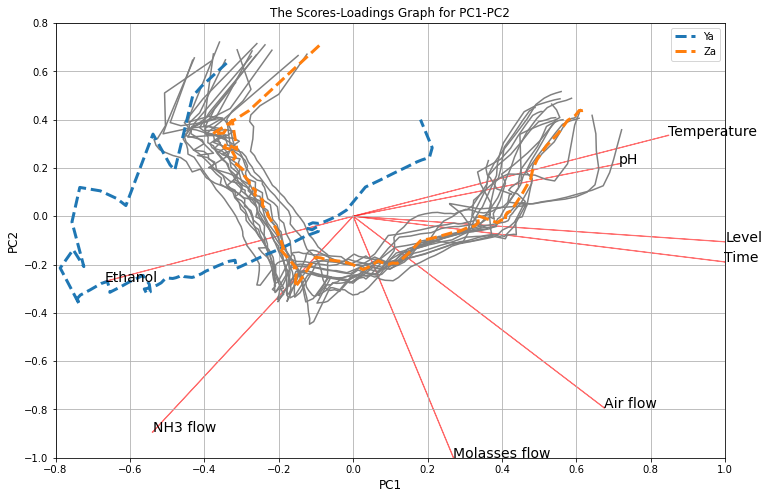

In [16]:
plt.figure(figsize=(12,8))
   
# Plot batches used to develop the model with solid lines
for i in batch_type:  
    # Scores
    xt = np.array(scores_pivot['PC1'][i])
    yt = np.array(scores_pivot['PC2'][i])
    xt_scaled = xt / (xt.max() - xt.min())
    yt_scaled = yt / (yt.max() - yt.min())
    
    plt.plot(xt_scaled, yt_scaled, color='grey')

# Display two new batches 
for i in ['Ya', 'Za']:
    xt = np.array(new_scores_pivot['PC1'][i])
    yt = np.array(new_scores_pivot['PC2'][i])

    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt

    plt.plot(xt_scaled, yt_scaled, '--', linewidth=3, label = i)
    plt.legend()
    

# Loading calculation
p_scaled = MaxAbsScaler().fit_transform(loadings_df.iloc[:,:2])

# Visualize direction of raw material 
for i in range(loadings_df.shape[0]):
    
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], 
              color = 'red',alpha = 0.5)
    
    plt.text(p_scaled[i,0], p_scaled[i,1], 
             loadings_df.index[i],  size=14)


plt.xlim(-.80,1)
plt.ylim(-1,.80)
plt.title ('The Scores-Loadings Graph for PC1-PC2',fontsize=12)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid()
plt.show()

    3. Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?
    
<div style='color:darkgreen'>
Batch Za is similar with the reference ones but Batch Ya is different from referece batches.The scores-loadings plot and dynamic time-series both indicates batch Ya has higher 'Ethanol', 'NH3 flow' levl, but lower level of 'Temperature', 'PH', 'Molasses flow',' Air flow'.